# Data Understanding and Data Visualization


#### Objectives


The objectives to be achieved with this notebook are as follows:

-   Explore the data to find out its characteristics or features useful for creating our Recommender System.
-   Prepare and convert the data to a more appropriate format.
-   Visualise the data in order to understand their relationships.


#### Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">Data Extraction</a></li>
        <li><a href="#ref2">Load Data</a></li>
        <li><a href="#ref3">Data Cleaning</a></li>
        <li><a href="#ref4">Data Engineering</a></li>
        <li><a href="#ref5">Data Interpretation</a></li>
    </ol>
</div>
<br>


<a id="ref1"></a>

## 1. Data Extraction

For this analysis we will use two datasets. A dataset containing board games and their main characteristics. And a dataset of users whose characteristics are related to the games that each user owns and their own evaluations of those games.

The data pertaining to the games dataset have been obtained from the Board Game Geek [BGG](https://boardgamegeek.com/). The download date of the dataset is 26/03/2021.


The data belonging to the user dataset were obtained from Web Scraping on a page associated with the BGG.


<a id="ref2"></a>

## 2. Load Data

#### Import libraries

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

pd.options.display.max_columns = None

### Board Games data

##### Read data

In [5]:
path='/Users/postigo/Google Drive/BoardGamesData' #Actualizar tras crear Prepair the Env
file = os.path.join(path, "bgg_GameItem.csv") 

In [15]:
bg=pd.read_csv(file, low_memory=False)
bg.head()

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
0,1,Die Macher,1986.0,5497,1,"12517,4959","133,2,2726,15108,39249,11652,5382,8147",3.0,5.0,4.0,5.0,5.0,5.0,14.0,14.031250,240.0,240.0,"1021,1026,1001","2916,2080,2012,2072,2040,2020",0,0,NaN,"10643,34116,91",NaN,NaN,286.0,5224,7.62849,1.57747,7.13389,4.3245,1.166667,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Dragonmaster,1981.0,5497,8384,12424,"64,20",3.0,4.0,3.0,4.0,3.0,4.0,12.0,NaN,30.0,30.0,"1002,1010",2009,0,0,NaN,7005,2174,NaN,3718.0,553,6.63055,1.44269,5.79353,1.9630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Samurai,1998.0,5497,2,11883,"17,133,267,29,7340,7335,41,2973,4617,1391,8291...",2.0,4.0,2.0,4.0,3.0,3.0,10.0,9.793103,30.0,60.0,"1009,1035","2080,2040,2026,2846,2004,2002",0,0,NaN,"10634,60111,42,28732",NaN,NaN,209.0,14736,7.45062,1.18523,7.24469,2.4885,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Tal der Könige,1992.0,NaN,8008,2277,37,2.0,4.0,2.0,4.0,2.0,4.0,12.0,NaN,60.0,60.0,1050,"2001,2080,2012,2004",0,0,NaN,"64229,6471,11505",NaN,NaN,4951.0,339,6.59888,1.23291,5.69032,2.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Acquire,1964.0,5497,4,"12658,18317","92,5,4871,3082,858,2962,5392,4668,38,4622,7107",2.0,6.0,3.0,6.0,4.0,4.0,12.0,11.735294,90.0,90.0,"1021,1086","2040,2910,2900,2911,2940,2005,2002,2874",0,0,NaN,4891,NaN,NaN,276.0,18189,7.33994,1.33515,7.15158,2.5041,1.090278,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print('Number rows and columns', bg.shape)

Number rows and columns (100052, 38)


In [17]:
bg.columns

Index(['bgg_id', 'name', 'year', 'game_type', 'designer', 'artist',
       'publisher', 'min_players', 'max_players', 'min_players_rec',
       'max_players_rec', 'min_players_best', 'max_players_best', 'min_age',
       'min_age_rec', 'min_time', 'max_time', 'category', 'mechanic',
       'cooperative', 'compilation', 'compilation_of', 'family',
       'implementation', 'integration', 'rank', 'num_votes', 'avg_rating',
       'stddev_rating', 'bayes_rating', 'complexity', 'language_dependency',
       'bga_id', 'dbpedia_id', 'luding_id', 'spielen_id', 'wikidata_id',
       'wikipedia_id'],
      dtype='object')

In [18]:
bg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100052 entries, 0 to 100051
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   bgg_id               100052 non-null  int64  
 1   name                 100052 non-null  object 
 2   year                 90954 non-null   float64
 3   game_type            21698 non-null   object 
 4   designer             85454 non-null   object 
 5   artist               40876 non-null   object 
 6   publisher            100038 non-null  object 
 7   min_players          98213 non-null   float64
 8   max_players          94686 non-null   float64
 9   min_players_rec      98213 non-null   float64
 10  max_players_rec      94686 non-null   float64
 11  min_players_best     98213 non-null   float64
 12  max_players_best     94686 non-null   float64
 13  min_age              77999 non-null   float64
 14  min_age_rec          906 non-null     float64
 15  min_time         

##### Quick overview of values

In [19]:
bg.describe(include='all')

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
count,100052.000000,100052,90954.000000,21698,85454,40876,100038,98213.000000,94686.000000,98213.000000,94686.000000,98213.000000,94686.000000,77999.000000,906.000000,79186.000000,7.918600e+04,98007,84576,100052.000000,100052.000000,697,58556,4651,3232,20323.000000,100052.000000,73855.000000,100052.000000,20624.000000,43412.000000,785.000000,0.0,0.0,0.0,0.0,0.0,0.0
unique,NaN,95592,NaN,41,28454,19215,31269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18219,17460,NaN,NaN,685,20233,3667,2762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Grand Prix,NaN,4664,3,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1009,2035,NaN,NaN,184011,"22184,8374",258,"1421,3969,7113",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,NaN,7435,18715,3769,5424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4457,7168,NaN,NaN,3,1949,35,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,128083.905029,NaN,1999.456593,NaN,NaN,NaN,NaN,2.037154,6.617219,2.042347,6.598325,2.074135,6.575006,9.420659,9.885323,53.089839,4.962246e+02,NaN,NaN,0.049005,0.006966,NaN,NaN,NaN,NaN,10167.401023,175.765772,6.005236,0.864632,5.688211,1.926472,2.101514,NaN,NaN,NaN,NaN,NaN,NaN
std,104699.488217,NaN,71.932626,NaN,NaN,NaN,NaN,0.813903,52.624641,0.819634,52.613976,0.857828,52.614735,7.919847,2.824056,650.529968,1.069209e+05,NaN,NaN,0.215879,0.083174,NaN,NaN,NaN,NaN,5872.224587,1619.001716,1.618081,0.860463,0.368113,0.845396,1.195129,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,-3500.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.025641,1.000000,1.000000e+00,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000,3.550380,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,28742.750000,NaN,1995.000000,NaN,NaN,NaN,NaN,2.000000,4.000000,2.000000,4.000000,2.000000,3.000000,7.000000,7.989583,15.000000,2.000000e+01,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,5081.500000,0.000000,5.000000,0.000000,5.510652,1.000000,1.012195,NaN,NaN,NaN,NaN,NaN,NaN
50%,113983.000000,NaN,2009.000000,NaN,NaN,NaN,NaN,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,10.000000,10.000000,30.000000,3.000000e+01,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,10160.000000,3.000000,6.048920,0.942809,5.548510,2.000000,1.733333,NaN,NaN,NaN,NaN,NaN,NaN
75%,217234.250000,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,6.000000,2.000000,6.000000,2.000000,6.000000,12.000000,11.957880,60.000000,6.000000e+01,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,15261.500000,18.000000,7.000000,1.505795,5.685128,2.500000,3.052632,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# We count the values of each id
bg['bgg_id'].value_counts()

163050    1
36219     1
101787    1
230810    1
312591    1
         ..
256616    1
98917     1
268926    1
282246    1
2047      1
Name: bgg_id, Length: 100052, dtype: int64

##### Null values for each column

In [21]:
bg.isnull().sum()

bgg_id                      0
name                        0
year                     9098
game_type               78354
designer                14598
artist                  59176
publisher                  14
min_players              1839
max_players              5366
min_players_rec          1839
max_players_rec          5366
min_players_best         1839
max_players_best         5366
min_age                 22053
min_age_rec             99146
min_time                20866
max_time                20866
category                 2045
mechanic                15476
cooperative                 0
compilation                 0
compilation_of          99355
family                  41496
implementation          95401
integration             96820
rank                    79729
num_votes                   0
avg_rating              26197
stddev_rating               0
bayes_rating            79428
complexity              56640
language_dependency     99267
bga_id                 100052
dbpedia_id

Columns with all their values null will be discarded in this analysis. We generate a new dataframe without those columns.

In [25]:
cols= ['bgg_id', 'name', 'year','designer','min_players', 'max_players','min_time', 'max_time', 'category','mechanic','cooperative']
bgames= pd.read_csv(file,usecols= cols, low_memory=False)
bgames.head()

,bgg_id,name,year,designer,min_players,max_players,min_time,max_time,category,mechanic,cooperative
0,1,Die Macher,1986.0,1,3.0,5.0,240.0,240.0,"1021,1026,1001","2916,2080,2012,2072,2040,2020",0
1,2,Dragonmaster,1981.0,8384,3.0,4.0,30.0,30.0,"1002,1010",2009,0
2,3,Samurai,1998.0,2,2.0,4.0,30.0,60.0,"1009,1035","2080,2040,2026,2846,2004,2002",0
3,4,Tal der Könige,1992.0,8008,2.0,4.0,60.0,60.0,1050,"2001,2080,2012,2004",0
4,5,Acquire,1964.0,4,2.0,6.0,90.0,90.0,"1021,1086","2040,2910,2900,2911,2940,2005,2002,2874",0


In [26]:
bgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100052 entries, 0 to 100051
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   bgg_id       100052 non-null  int64  
 1   name         100052 non-null  object 
 2   year         90954 non-null   float64
 3   designer     85454 non-null   object 
 4   min_players  98213 non-null   float64
 5   max_players  94686 non-null   float64
 6   min_time     79186 non-null   float64
 7   max_time     79186 non-null   float64
 8   category     98007 non-null   object 
 9   mechanic     84576 non-null   object 
 10  cooperative  100052 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 8.4+ MB


### Users data

##### Read data

### Year Released

The column 'year' corresponds to the year of release of the game.

We sort the dataset according to this column.

In [15]:
year = df1.sort_values('year', ascending=False)
year.head(50)

,bgg_id,name,year,designer,min_players,max_players,min_time,max_time,category,mechanic,cooperative,rank,num_votes
86172,271081,Dominus,2023.0,101308,1.0,4.0,15.0,30.0,1035,"2048,2002,2082",0,NaN,0
99507,330152,Nature,2023.0,3245,2.0,5.0,30.0,60.0,"1089,1002,1094,1084,1036","2956,2040,2070",0,NaN,0
92040,299106,Fractal: Beyond the Void,2022.0,"123810,123809,116798,116799",1.0,4.0,60.0,180.0,"1022,1015,1047,1001,1016,1113,1019","2001,2018,2040,2824,2011,2822,2015,2897",0,NaN,9
97579,322619,Scarface,2022.0,88597,2.0,2.0,25.0,25.0,"1094,1033","2041,2857,2040",0,NaN,0
99592,330579,Raising Chicago,2022.0,79529,2.0,4.0,75.0,120.0,"1029,1021,1086",2910,0,NaN,0
99254,329226,Circadians: Chaos Order,2022.0,"103821,133311",2.0,5.0,120.0,240.0,1016,"2080,2046,2857,2026,2958,2015",0,NaN,1
99433,329862,Tiny Turbo Cars,2022.0,"91211,114249,114247,114248,114090",2.0,4.0,30.0,45.0,"1028,1031","2689,2887,2011,2953,2876,2831,2015",0,NaN,0
99734,331317,Coalitions,2022.0,129507,2.0,6.0,60.0,240.0,"1051,1026,1001,1019","2080,2046,2018,2040,2685,2015",0,NaN,0
99735,331318,Citytrip Junior,2022.0,132082,1.0,6.0,15.0,25.0,1020,"2999,2039,2081,2055,2007,2661,2819",0,NaN,0
98995,328272,Bliss,2022.0,113983,1.0,5.0,45.0,90.0,1002,"2875,2902,2020,2015,2082",0,NaN,0


We checked the records for the year 2021 and 2022. Many of the games for 2021 are not yet published.

In [16]:
year['year'][year['year'].isin([2021, 2022])].count()

1828

In [17]:
year['year'][year['year']==2020].count()

4463

In [18]:
year.tail(50)

,bgg_id,name,year,designer,min_players,max_players,min_time,max_time,category,mechanic,cooperative,rank,num_votes
99492,330069,Tribal Souls,NaN,133606,1.0,8.0,NaN,NaN,NaN,NaN,0,NaN,0
99525,330228,Монополия: Курск,NaN,NaN,2.0,5.0,45.0,45.0,"1021,1026","2012,2685,2035,2004,2008",0,NaN,0
99528,330233,Sekai no Hate made Itte Q!,NaN,NaN,2.0,6.0,NaN,NaN,"1064,1027",2035,0,NaN,0
99569,330506,Black Stories Junior: Stadt-Land-Ferien,NaN,NaN,2.0,50.0,2.0,222.0,"1041,1097","2055,2020",0,NaN,0
99573,330528,Конни Състезания Фюри,NaN,133843,2.0,5.0,NaN,NaN,"1089,1017,1064,1031",2072,0,NaN,1
99577,330535,Diagonale,NaN,NaN,1.0,2.0,NaN,NaN,"1009,1031","2676,2940",0,NaN,0
99580,330539,Cutthroat Cove: Pieces of Eight,NaN,NaN,2.0,4.0,10.0,15.0,"1002,1090","2040,2047,2686",0,NaN,0
99630,330746,Wizards of Mickey: First Age,NaN,"10066,6838,10052",2.0,2.0,15.0,15.0,"1023,1002,1044,1116,1010,1079,1064","2041,2040,2009,2015",0,NaN,0
99640,330788,Off the Line,NaN,2961,2.0,2.0,60.0,120.0,"1002,1046,1019,1049","2001,2840,2841,2850,2676,2026,2011,2822",0,NaN,0
99647,330821,Destination Great Britain,NaN,4670,2.0,6.0,60.0,60.0,1097,2046,0,NaN,0


We check for null records for the column 'year'.

In [19]:
year['year'].isnull().sum()

9098

We check the records with rare years (-3500, -3000).

In [20]:
year['year'][year['year'].isin([-3500, -3000])].count()

6

From this brief analysis we can conclude that the dataset contains current games, very old games and games 
whose year of creation is unknown. Many of the old games contained in the dataset are out of print and can 
currently only be found in private collections.
As the aim of this analysis is the further creation of a Recommendation System for modern board games, after 
consulting several bibliographical sources, we will consider 1970 as the year when modern board games began 
to be created.
Our analysis will be done with the games created from that year onwards.

In [21]:
year['year'][year['year']<1970].count()

6307

In [22]:
year['year'][year['year']>=1970].count()

84647

In [23]:
year[year['year']>=1970].isnull().sum()

bgg_id             0
name               0
year               0
designer       10083
min_players      876
max_players     3332
min_time       13914
max_time       13914
category        1586
mechanic       11957
cooperative        0
rank           64965
num_votes          0
dtype: int64

In [24]:
games=df1[df1['year']>=1970]
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84647 entries, 0 to 100051
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bgg_id       84647 non-null  int64  
 1   name         84647 non-null  object 
 2   year         84647 non-null  float64
 3   designer     74564 non-null  object 
 4   min_players  83771 non-null  float64
 5   max_players  81315 non-null  float64
 6   min_time     70733 non-null  float64
 7   max_time     70733 non-null  float64
 8   category     83061 non-null  object 
 9   mechanic     72690 non-null  object 
 10  cooperative  84647 non-null  int64  
 11  rank         19682 non-null  float64
 12  num_votes    84647 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 9.0+ MB


###### Number of games released each year

In [25]:
year_num=list(games['year'])
year_count={i:year_num.count(i) for i in year_num}
print(year_count)

{1986.0: 876, 1981.0: 612, 1998.0: 1068, 1992.0: 869, 1989.0: 824, 1978.0: 513, 1993.0: 797, 1997.0: 901, 1999.0: 1094, 1995.0: 937, 1977.0: 549, 1996.0: 870, 1994.0: 852, 1991.0: 837, 1988.0: 772, 1979.0: 554, 1984.0: 751, 1987.0: 872, 1975.0: 580, 1982.0: 570, 1980.0: 603, 1990.0: 886, 1974.0: 420, 1972.0: 348, 1983.0: 706, 1985.0: 827, 1973.0: 408, 2000.0: 1265, 2002.0: 1608, 1971.0: 260, 1976.0: 506, 2001.0: 1376, 1970.0: 356, 2003.0: 1713, 2011.0: 2978, 2012.0: 3052, 2004.0: 2039, 2005.0: 2429, 2009.0: 2784, 2007.0: 2510, 2010.0: 2832, 2006.0: 2384, 2008.0: 2509, 2014.0: 3540, 2015.0: 3796, 2013.0: 3087, 2016.0: 4062, 2017.0: 4192, 2018.0: 4436, 2019.0: 4744, 2021.0: 1724, 2020.0: 4463, 2022.0: 104, 2023.0: 2}


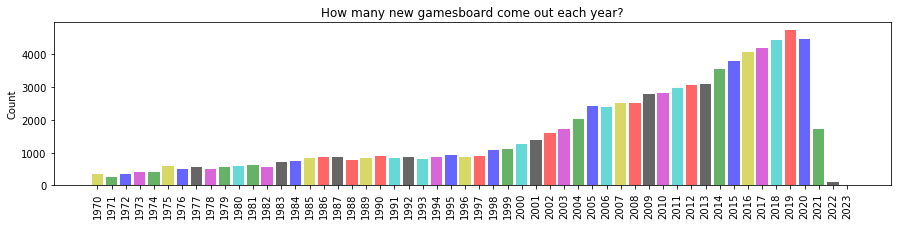

In [26]:
yy= list(year_count.values())
xy= list(year_count.keys())

plt.figure(figsize=(15,3))
plt.bar(xy,yy, alpha=0.6, color=list('rgbkymc'))
plt.xticks(xy, rotation=90)
plt.ylabel('Count')
plt.title('How many new gamesboard come out each year?')
plt.show();